# Machine Learning 

Zhentao Shi

## Introduction

Machine learning and artificial intelligence:

* Technology or alchemy?
* Statistics or biology?

* [Tom Sargent](https://www.project-syndicate.org/commentary/artificial-intelligence-new-economic-models-by-thomas-j-sargent-2019-11)


## Reference

* [ISLR] James, Gareth., Witten, Daniela., Hastie, Trevor., & Tibshirani, Robert. (2017). An introduction to statistical learning.  (Open access at https://www.statlearning.com/)
* [ESL] Friendman, Hastie and Tibshirani (2001, 2008): Elements of Statistical Learning (Open access at https://hastie.su.domains/Papers/ESLII.pdf)

* Athey (2018) 
* Mullainathan and Spiess (2017)

## Supervised Learning

* Connection between $X$ and $Y$
* Regression and classification

A set of data fitting procedures focusing on out-of-sample prediction
* Repeat a scientific experiment for $n$ times and obtain a dataset $(y_i, x_i)_{i=1}^n$.
* How to best predict $y_{n+1}$ given $x_{n+1}$?

# Unsupervised Learning

* Only about $X$
* Density estimation, principal component analysis, and clustering


# Conventional Statistics

* Consistency
* Asymptotic distribution (hopefully normal)
* Efficiency

# Machine Learning's Responses

* Efficiency is mostly irrelevant given big data
* Statistical inference may not be the goal
    * Recommendation system on Amazon or Taobao
    * Care about the prediction accuracy, not the causal link
* Is there a data generating process (DGP)?

# First Generation

## Nonparametric Estimation

* *Parametric*: a finite number of parameters
* *Nonparametric*: an infinite number of parameters

* Some ideas in nonparametric estimation is directly related to machine learning

# Example: Density Estimation

* Density estimation given a sample $(x_1,\ldots,x_n)$
* If drawn from a parametric family, MLE for estimation
* Misspecification 

* Histogram is nonparametric
    * If grid too fine, small bias but large variance
    * If grid too coarse, small variance but large bias
    

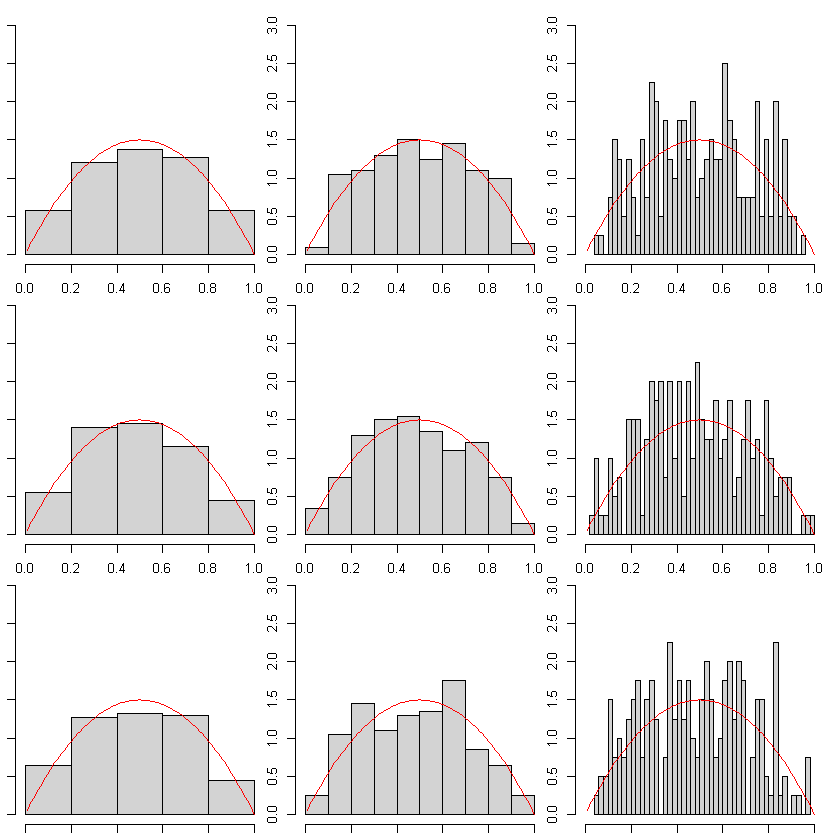

In [1]:
n <- 200

par(mfrow = c(3, 3))
par(mar = c(1, 1, 1, 1))

x_base <- seq(0.01,1,by = 0.01)
breaks_list = c(4, 12, 60)

for (ii in 1:3){
  x <- rbeta(n, 2, 2) # beta distribution
  for ( bb in breaks_list){
    hist(x, breaks = bb, main="", freq = FALSE, ylim = c(0,3),xlim = c(0,1))
    lines( y = dbeta( x_base, 2, 2), x = x_base , col = "red" )
  }
}


## Variance-Bias Tradeoff

![](graph/bias_variance.png)

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

* Restrict the class of functions to search for minimizer
    * Assume differentiability
* One way is kernel method based on density estimation

# Series Estimation

* Series expansion to approximate $f(x)$
* Generates many additive regressors
    * Ex: bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$.
    * In finite sample, choose a finite $K$, usually much smaller than $n$
    * Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

* Bias-variance trade-off
    * Big $K$: small bias and large variance 
    * Small $K$: small variance and large bias

# Penalization

* Specify a sufficiently large $K$, and then add a penalty term to control the complexity
* Eg: *Ridge regression*: 
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. 

In compact notation, let $Y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2
$$

# Tuning Parameter

* *Information criterion*: AIC, BIC
* *Cross validation*


* Active statistical research, but has little economics

# Econometrics Workflow

![](graph/metric_flow.png)

## Data Splitting

![ ](graph/ML_flow.png)

## Data Splitting


* Machine learning's main purpose is often prediction
* Agnostic about the DGP.
* Models are measured by their performance in prediction.
* Tuning.

* Training dataset
* Validation dataset

* Testing sample

# `Caret` Package

* R package `caret` (Classification And REgression Training): a framework for many machine learning methods
* The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross sectional data and time series.

### Cross Validation (cross sectional data)

* $S$-fold cross validation partitions the dataset into $S$ disjoint sections
* Each iteration picks one of the sections as the (quasi) validation sample
* The other $S-1$ sections as the training sample.
* Compute an out-of-sample goodness-of-fit measurement

### Goodness of Fit (Out of Sample)

* *Mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality, 
* *Mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. 
* *Out of sample R-squared* (OOS $R^2$):

$$
1 - \frac{{n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2}{{n_v}^{-1} \sum_{i \in val} y_i^2}
$$

* Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, 
* Average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. 
* In practice we can use  $S=5$ for 10

### Cross Validation (time series data)

* In time series context, cross validation must preserve the dependence structure. 
* If the time series is stationary, we can partition the data into $S$ consecutive blocks. 


(i will skip this slide)

* If the purpose is forecasting, then we can use nested CV. 
![ ](graph/CV_Figure.png)

* Nested CV with fixed-length rolling window scheme
* The sub-training data can also be an extending rolling window.

## Variable Selection

* Number of covariates $x_i$ can be large.

* Conventional attitude: prior knowledge
* Recently economists wake up from the long lasting negligence.
    * Stock and Watson (2012): forecasting 143 US macroeconomic indicators.
    * A horse race of several variable selection methods.

# Lasso

* least-absolute-shrinkage-and-selection-operator
(Lasso) (Tibshirani, 1996)
* Penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. 

Lasso shrinks some coefficients exactly to 0, in a wide range of values of $\lambda$


![ ](graph/lasso_regression2.png)


# SCAD

* Smoothly-clipped-absolute-deviation (SCAD) Fan and Li (2001):
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. 

* SCAD enjoys *oracle property*. 


# Adaptive Lasso

*Adaptive Lasso* (Zou, 2006) also enjoys the oracle property.

Two-step algorithm:
1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$
2. Solve 

$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|
$$ 

where $w_j = 1 /  |\hat{\beta}_j^{(1)} |^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).

* Lee, Shi and Gao (2022)

R packages

* `glmnet` or `LARS` implements Lasso
* `ncvreg` carries out SCAD. 
* Adaptive Lasso by setting the weight via the argument `penalty.factor` in `glmnet`.

[1] 4.273546 4.259028 8.932815


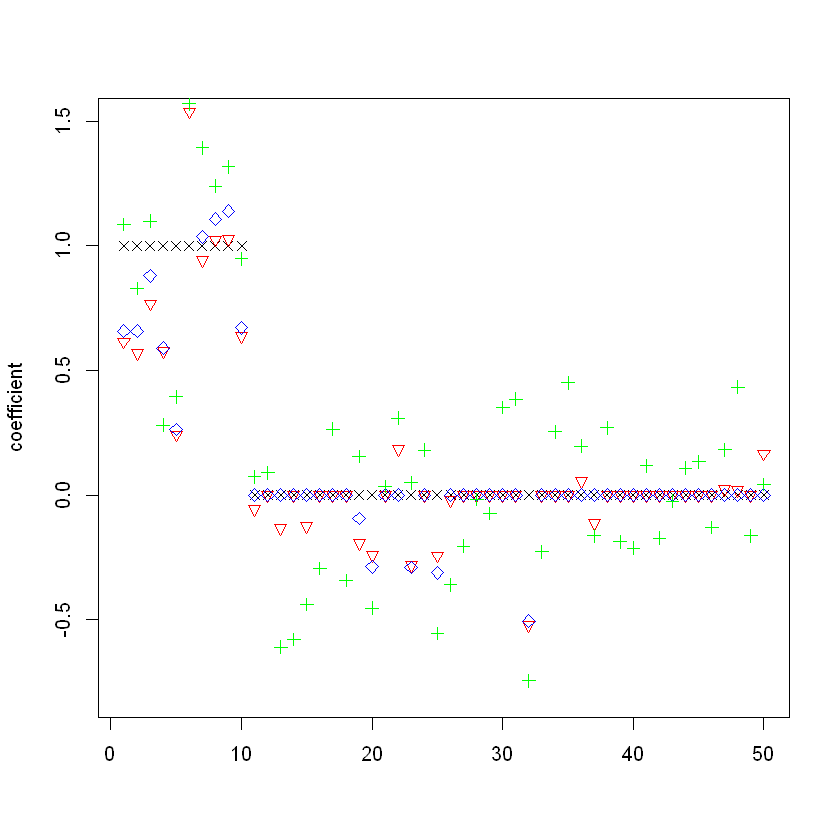

In [4]:
library(magrittr)
n <- 40
p <- 50
b0 <- c(rep(1, 10), rep(0, p - 10))
x <- matrix(rnorm(n * p), n, p)
y <- x %*% b0 + rnorm(n)

ols <- MASS::ginv(t(x) %*% x) %*% (t(x) %*% y) # OLS
# Implement Lasso by glmnet
cv_lasso <- glmnet::cv.glmnet(x, y)
lasso_result <- glmnet::glmnet(x, y, lambda = cv_lasso$lambda.min)

# Get weights
b_temp <- as.numeric(lasso_result$beta)
b_temp[b_temp == 0] <- 1e-8
w <- 1 / abs(b_temp) # Let gamma = 1

# Implement Adaptive Lasso by glmnet
cv_alasso <- glmnet::cv.glmnet(x, y, penalty.factor = w)
alasso_result <-
  glmnet::glmnet(x, y, penalty.factor = w, lambda = cv_alasso$lambda.min)

plot(b0, ylim = c(-0.8, 1.5), pch = 4, xlab = "", ylab = "coefficient")
points(lasso_result$beta, col = "red", pch = 6)
points(alasso_result$beta, col = "blue", pch = 5)
points(ols, col = "green", pch = 3)
 
# out of sample prediction
x_new <- matrix(rnorm(n * p), n, p)
y_new <- x_new %*% b0 + rnorm(n)
lasso_msfe <- (y_new - predict(lasso_result, newx = x_new)) %>% var()
alasso_msfe <- (y_new - predict(alasso_result, newx = x_new)) %>% var()
ols_msfe <- (y_new - x_new %*% ols) %>% var()

print(c(lasso_msfe, alasso_msfe, ols_msfe))


### DIY Lasso by `CVXR`. 


In [5]:
library(CVXR)

lambda <- 2 * cv_lasso$lambda.min # tuning parameter

# CVXR for Lasso
beta_cvxr <- Variable(p)
obj <- sum_squares(y - x %*% beta_cvxr) / (2 * n) + lambda * p_norm(beta_cvxr, 1)
prob <- Problem(Minimize(obj))
lasso_cvxr <- solve(prob)
beta_cvxr_hat <- lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print()


Warning message:
"package 'CVXR' was built under R version 4.2.3"

Attaching package: 'CVXR'


The following object is masked from 'package:stats':

    power




 [1]  7.836292e-01  4.909321e-01  7.285535e-01  6.610488e-01  3.600521e-01
 [6]  1.470885e+00  7.780719e-01  7.896610e-01  1.129968e+00  6.880147e-01
[11] -1.616845e-22  2.852661e-22  3.711087e-22 -3.316071e-22 -1.379906e-02
[16] -1.628364e-22 -1.499809e-22 -3.569860e-22 -2.430960e-02 -1.155485e-22
[21] -8.768656e-02  6.261535e-23 -1.045360e-01  6.015717e-23 -2.934565e-01
[26]  2.274072e-22  8.933526e-23  3.727675e-23 -1.297585e-22  5.624980e-22
[31]  1.254969e-23 -4.381265e-01  3.719543e-22 -1.595437e-22 -4.208724e-22
[36]  4.701589e-23 -1.433162e-01 -3.270297e-22 -1.785107e-22 -1.169864e-22
[41]  1.831003e-01 -1.493608e-22  1.034732e-22  1.367101e-22 -3.049205e-22
[46] -4.921756e-04  5.170777e-22 -9.103741e-22  3.236104e-23  3.682813e-22


# Stagewise Forward Selection

More methods are available if prediction of the response variables is the sole purpose of the regression.

Eg: *stagewise forward selection*

1. Start from an empty model. 
2. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. 

Close to the idea of *$L_2$ componentwise boosting*
which does not adjust the coefficients fitted earlier

* Shi and Huang (2023)


# Second Generation

# Prediction-Oriented Methods

* Methods that induces data-driven interaction of the covariates.
* Interaction makes the covariates much more flexible
* Insufficient theoretical understanding
* "Black-boxes" methods

* Surprisingly superior performance
* Industry insiders are pondering "alchemy"

# Regression Tree

* Supervised learning: $x \to y $
* Traditional nonparametric methods: kernel or series

* Regression tree (Breiman, 1984) recursively partitions the space of the regressors
    * Each time a covariate is split into two dummies
    * Splitting criterion is aggressive reduction of the SSR
    
    * Tuning parameter is the depth of the tree
    * Given a dataset $d$ and the depth of the tree, the fitted tree $\hat{r}(d)$ is deterministic


- Example: Using longitude and latitude for Beijing housing price.

# Bagging

* Tree is unstable
* *Bootstrap averaging*, or *bagging*, reduces variance of trees (Breiman, 1996)
    * Grow a tree for each bootstrap sample
    * Simple average

* An example of the *ensemble learning*.

* Inoue and Kilian (2008): an early application of bagging in time series forecast.
* Hirano and Wright (2017): a theoretical perspective on the risk reduction of bagging.

# Random Forest

* *Random forest* (Breiman, 2001):
    * Draw a bootstrap sample
    * Before each split, shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites. Stop until the depth of the tree is reached.
    * Average the trees over the bootstrap samples
    
* The tuning parameters are the tree depth and $m$
* More stable than bagging thanks to "de-correlation"

Loading required package: randomForest

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn




,IncNodePurity
crim,1373.07707
zn,247.35123
indus,1326.18996
chas,47.87453
nox,1527.38467
rm,6075.29521
age,1031.69446
dis,1551.31102
rad,164.36409
tax,788.77341


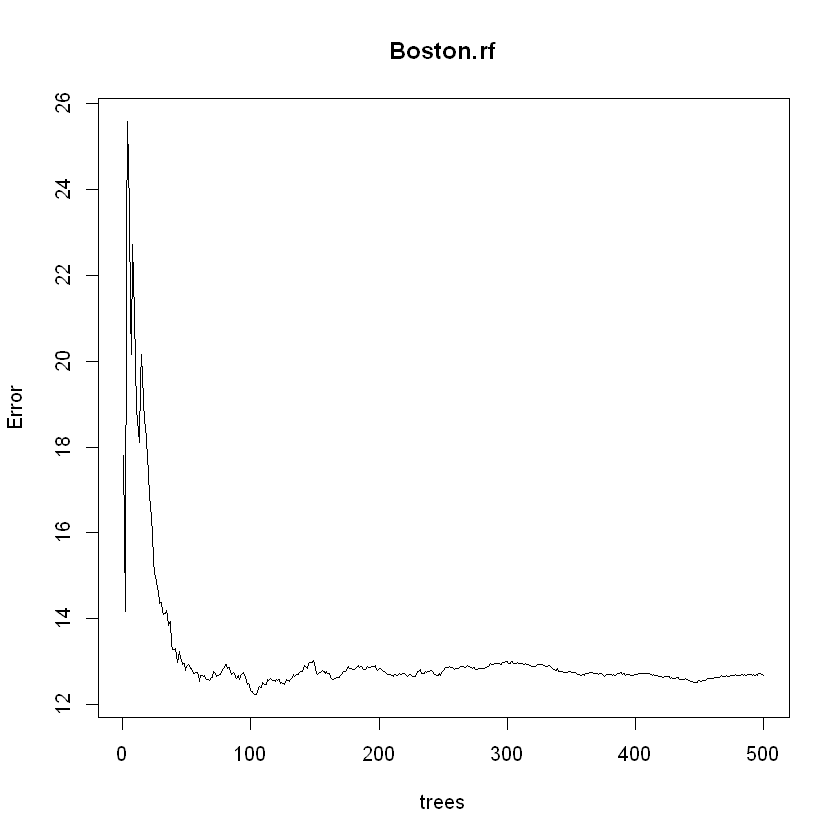

In [2]:
require(randomForest)
require(MASS)#Package which contains the Boston housing dataset
attach(Boston)
set.seed(101)

#training Sample with 300 observations
train=sample(1:nrow(Boston),300)

Boston.rf=randomForest(medv ~ . , data = Boston, subset = train)
plot(Boston.rf)

# getTree(Boston.rf)
importance(Boston.rf)


* Consistency of random forest is not proved
until Scornet, Biau, and Vert (2015)
* Inferential theory was first established by
Wager Athey (2018)  in the context of treatment effect estimation
* Athey, Tibshirani, and Wager (2019) generalizes CART to local maximum likelihood.

## Gradient Boosting

* Bagging and random forest use equal weight on each generated tree for the ensemble
* Tree boosting takes a deterministic approach for the weights
    1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
   $\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
   the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
    2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
   the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
    3. Repeat Step 2 until $m > M$.

* Boosting has three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$
* The algorithm can be sensitive to any of the three tuning parameters
* When a model is tuned well, it can performs remarkably
    * Example: Beijing housing data.
    * Gradient boosting via the package `gbm`

Statisticians view boosting as a gradient descent algorithm to reduce the risk. The fitted
tree in each iteration is the deepest descent direction, while the shrinkage tames the fitting to avoid proceeding too aggressively.

## Real Data Example

In [11]:
library(caret)


load("data_example/lianjia.RData")
N <- nrow(lianjia) # a smaller sample
lianjia <- lianjia[base::sample(1:N, round(N * 0.05 )), ]

train_ind <- caret::createDataPartition(1:nrow(lianjia), p = 0.1)$Resample1
# p = 0.1 to save time. Better to use p = 0.75

gbmGrid <- expand.grid(
  interaction.depth = seq(from = 10, to = 50, by = 30),
  n.trees = seq(from = 1000, to = 10000, by = 4000),
  shrinkage = c(0.01),
  n.minobsinnode = 20
)

gbmControl <- caret::trainControl(method = "cv", number = 5)

In [12]:
formula.GBM <- price ~
  square + livingRoom + drawingRoom + kitchen + bathRoom +
  floor_type + floor_total + elevator + ladderRatio +
  age + DOM + followers + fiveYearsProperty +
  subway + district + Lng + Lat + t_trade +
  communityAverage

In [13]:
library(doParallel)
library(gbm)

gbmControl=trainControl(method="repeatedcv",number=5,repeats=1)

registerDoParallel(8)
t=Sys.time()
boostingReg=train(formula.GBM, 
                  data=lianjia[train_ind,],
                  method="gbm",
                  distribution="gaussian",
                  trControl=gbmControl,
                  tuneGrid=gbmGrid,
                  metric="Rsquared",
                  verbose=F)
cat("Time Cost of Finding Best Tuning Parameters:",Sys.time()-t,"\n")
doParallel::stopImplicitCluster()

Time Cost of Finding Best Tuning Parameters: 1.615394 


In [14]:
gbmTune = boostingReg$bestTune
cat("The best tuning parameters for GBM are: \n");
print(gbmTune)

pred.boosting=predict(boostingReg,newdata=lianjia[-train_ind,])

The best tuning parameters for GBM are: 
  n.trees interaction.depth shrinkage n.minobsinnode
1    1000                10      0.01             20


In [15]:
lmReg=lm(formula.GBM, data=lianjia[train_ind,])
pred.lm=predict(lmReg,newdata=lianjia[-train_ind,])


# Comparison

target=lianjia[-train_ind,]$price
cat("R-squared of GBM prediction =",miscTools::rSquared(target,target-pred.boosting),"\n")
cat("R-squared of LM prediction =",miscTools::rSquared(target,target-pred.lm),"\n")

R-squared of GBM prediction = 0.9164412 
R-squared of LM prediction = 0.8261253 


* Many variants of boosting algorithms
    * $L_2$-boosting
    * componentwise boosting
    * AdaBoosting, etc

## Neural Network

* Artificial neural network (ANN) is the workhorse behind Alpha-Go and self-driven cars
* A particular type of nonlinear models.

![ANN](graph/Colored_neural_network.png)

* The transition from layer $k-1$ to layer $k$ can be written as

$$
\begin{eqnarray*}
z_l^{(k)} & = & w_{l0}^{(k-1)} + \sum_{j=1}^{p_{k-1} } w_{lj}^{(k-1)} a_j^{(k-1)} \\ 
a_l^{(k)} & = & g^{(k)} ( z_l^{(k)}), 
\end{eqnarray*}
$$

where $ a_j^{(0)} = x_j$ is the input.

* The latent variable $z_l^{(k)}$ usually takes a linear form
* *Activation function* $g(\cdot)$ is usually a simple nonlinear function
* Popular choice: sigmoid ($1/(1+\exp(-x))$); ReLu, $z\cdot 1\{x\geq 0\}$)

A user has several decisions to make
* Activation function
* Number of hidden layers
* Number of nodes in each layer


* Many free parameters are generated from the multiple layer and multiple nodes
* In estimation often regularization methods are employed to penalize
the $l_1$ and/or $l_2$ norms, which requires extra tuning parameters

#  Theory is Underdeveloped

* Theoretical understanding about its behavior is scant
* Hornik, Stinchcombe, and White (1989):
    * A single hidden layer neural network, given enough many nodes, is a *universal approximator* for any
measurable function.

# Computation

* Free parameters must be determined by
numerical optimization
* Nonlinear complex structure makes the optimization
very challenging and the global optimizer is beyond guarantee
* De facto optimization algorithm
is *stochastic gradient descent*

* Google's `tensorflow`
* `keras` is the deep learning modeling language

## Stochastic Gradient Descent (SGD)

* In optimization the update formula

$$
\beta_{k+1} = \beta_{k} + a_k p_k,
$$
  
  * step length $a_k \in \mathbb{R}$ 
  * vector direction $p_k$

* Talyor expansion,
$$
f(\beta_{k+1}) = f(\beta_k + a_k p_k ) \approx f(\beta_k) + a_k \nabla f(\beta_k) p_k,
$$

* Choose $p_k$ to reduce $f(x)$ 
* A simple choice is $p_k =-\nabla f(\beta_k)$.

c.f.:
* Newton's method:$p_k =- (\nabla^2 f(\beta_k))^{-1}  \nabla f(\beta_k)$
* BFGS uses a low-rank matrix to approximate $\nabla^2 f(\beta_k)$

* When sample size and/or number of parameter is big, prohibitively expensive to evaluate gradient
* SGD uses a small batch of the sample to evaluate the gradient in each iteration. 

* SGD involves tuning parameters 
  * say, batch size
  * learning rate

* Careful experiments must be carried out before serious implementation.

### Experiment

Use SGD in the PPMLE
* sample size 100,000
* the number of parameters 100


In [16]:
poisson.loglik = function( b, y, X ) {
  b = as.matrix( b )
  lambda =  exp( X %*% b )
  ell = -mean( -lambda + y *  log(lambda) )
  return(ell)
}


poisson.loglik.grad = function( b, y, X ) {
  b = as.matrix( b )
  lambda =  as.vector( exp( X %*% b ) )
  ell = -colMeans( -lambda * X + y * X )
  ell_eta = ell
  return(ell_eta)
}

In [17]:
##### generate the artificial data
set.seed(898)
nn = 1e5; K = 100

X = cbind(1, matrix( runif( nn*(K-1) ), ncol = K-1 ) )
b0 = rep(1, K) / K
y = rpois(nn, exp( X %*% b0 ) )


b.init = runif(K); b.init  = 2 * b.init / sum(b.init)

In [18]:
# and these tuning parameters are related to N and K

n = length(y)
test_ind = sample(1:n, round(0.2*n) ) 

# 80% training data
# 20% testing data

y_test = y[test_ind]
X_test = X[test_ind, ]

y_train = y[-test_ind ]
X_train = X[-test_ind, ]

In [19]:
# optimization parameters

# sgd depends on
# * eta: the learning rate
# * epoch: the averaging small batch
# * the initial value

set.seed(105)

max_iter = 5000
min_iter = 20
eta=0.01
epoch = round( 100*sqrt(K) )


b_old = b.init

pts0 = Sys.time()
# the iteration of gradient
for (i in 1:max_iter ){

  loglik_old = poisson.loglik(b_old, y_train, X_train)
  i_sample = sample(1:length(y_train), epoch, replace = TRUE )
  b_new = b_old - eta * poisson.loglik.grad(b_old, y_train[i_sample], X_train[i_sample, ])
  loglik_new = poisson.loglik(b_new, y_test, X_test)
  b_old = b_new # update

  criterion =  loglik_old - loglik_new  
  if (  criterion < 0.0001 & i >= min_iter ) break
}
cat("point estimate =", b_new, ", log_lik = ", loglik_new, "\n")
pts1 = Sys.time( ) - pts0
print(pts1)

point estimate = -0.007249861 0.0138033 0.006121163 0.006204153 0.001798774 -0.009304036 -0.006873972 -0.00481955 -0.007800092 0.02711295 0.02655227 0.008583107 0.005909385 -0.005516035 -0.004789239 -0.003592118 0.001915902 -0.00305892 0.004406357 0.01935639 0.02747918 0.02257842 0.02094568 0.01654139 0.02467052 0.02637046 0.01483604 0.01598381 0.0008255997 0.02621043 0.01620266 -0.0009979067 0.008017293 -0.006191963 -0.005256497 0.01174968 0.005335572 0.02215786 0.01608107 0.02225445 0.01016261 0.01537138 -0.0001712781 0.02720083 0.008683446 -0.008486209 0.01793224 0.005103203 -0.007451151 -0.004670695 0.0249739 -0.003024627 0.02890942 0.01310197 0.02309366 0.01442766 0.003820778 0.02327051 0.02575562 0.02914741 0.0188664 -0.002761642 -0.004392489 -0.002543685 0.02377113 0.0200645 0.01171033 0.007716341 0.02242529 0.02809975 0.009372334 0.004039922 0.01926306 0.01943598 -0.009137019 0.001535105 -0.00656257 0.0123897 0.02772417 0.01842174 -0.005104174 0.02817047 0.02030566 0.02858702 -

In [20]:
# optimx is too slow for this dataset.
# Nelder-Mead method is too slow for this dataset

# thus we only sgd with NLoptr

opts = list("algorithm"="NLOPT_LD_SLSQP","xtol_rel"=1.0e-7, maxeval = 5000)


pts0 = Sys.time( )
res_BFGS = nloptr::nloptr( x0=b.init,
                 eval_f=poisson.loglik,
                 eval_grad_f = poisson.loglik.grad,
                 opts=opts,
                 y = y_train, X = X_train)
print( res_BFGS )
pts1 = Sys.time( ) - pts0
print(pts1)

b_hat_nlopt = res_BFGS$solution


#### evaluation in the test sample
cat("\n\n\n\n\n\n\n")
cat("log lik in test data by sgd = ", poisson.loglik(b_new, y = y_test, X_test), "\n")
cat("log lik in test data by nlopt = ", poisson.loglik(b_hat_nlopt, y = y_test, X_test), "\n")
cat("log lik in test data by oracle = ", poisson.loglik(b0, y = y_test, X_test), "\n")


Call:

nloptr::nloptr(x0 = b.init, eval_f = poisson.loglik, eval_grad_f = poisson.loglik.grad, 
    opts = opts, y = y_train, X = X_train)


Minimization using NLopt version 2.7.1 

NLopt solver status: 4 ( NLOPT_XTOL_REACHED: Optimization stopped because 
xtol_rel or xtol_abs (above) was reached. )

Number of Iterations....: 50 
Termination conditions:  xtol_rel: 1e-07	maxeval: 5000 
Number of inequality constraints:  0 
Number of equality constraints:    0 
Optimal value of objective function:  0.817239347882672 
Optimal value of controls: 0.008377464 0.00223468 0.006802827 0.009527097 -0.009179097 0.001837231 
-0.001861563 0.0250962 0.007914374 0.01430903 0.0185239 0.0009192213 
-0.003079815 0.02091482 0.01838836 0.02317564 0.007484981 0.02760165 0.02395294 
0.02581524 0.0008703182 0.003018651 -0.0008777799 0.005505568 -0.006333724 
0.007045993 0.009869454 0.01635177 0.02444754 0.01859429 0.002282465 
-0.006204774 0.01787497 0.00871074 0.01634583 0.01452785 0.01535949 0.02114798 
0

# Summary

* Mature algorithms for implementation
* Theoretical investigation is in progress
* Economic applications are emerging

* Lehrer and Xie (2017) 
* Feng, Giglio, and Xiu (2019)
* Chinco, Clark-Joseph, and Ye (2019)